We start step by step, we know (by our expert knowledge), that 2 & 3 are our most cyclical products families, let's get started with the first one. Then , in order to know a first aproximation of how difficult is to solve generally this problem, whe will use two basic predictors not related whit ML:
1) the same week one year ago (we are going to use the weeks dataset).
2) the Exponential Moving Average of the last years (with different values for alpha). This method is very used for smoothing graphics in the trading sector.

$E M A_{t}=\left\{\begin{array}{cc}
x_{0} & t=0 \\
\alpha x_{t}+(1-\alpha) E M A_{t-1} & t>0
\end{array}\right.$

In [13]:

## and now we import our own library which today we will use for getting our base line predictions:
from info_extraction import predict_with_ema, predict_with_last_year

import pandas as pd
import numpy as np

##required for plots: 
##in order to perform the visualization tasks:
import matplotlib.pyplot  as plt

## error metrics:
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir("../../../../../data/processed")

In [25]:
os.getcwd()

'c:\\Users\\Javier\\Documents\\GIT\\Repositories\\TFM-Textil-Santanderina\\data\\processed'

In [4]:
y = pd.read_pickle("time_serie_y_total_production_2_weekly.pkl")
x = pd.read_pickle("time_serie_x_total_production_2_weekly.pkl")

Let's see at first sight how it looks the time series only for our 2nd family:

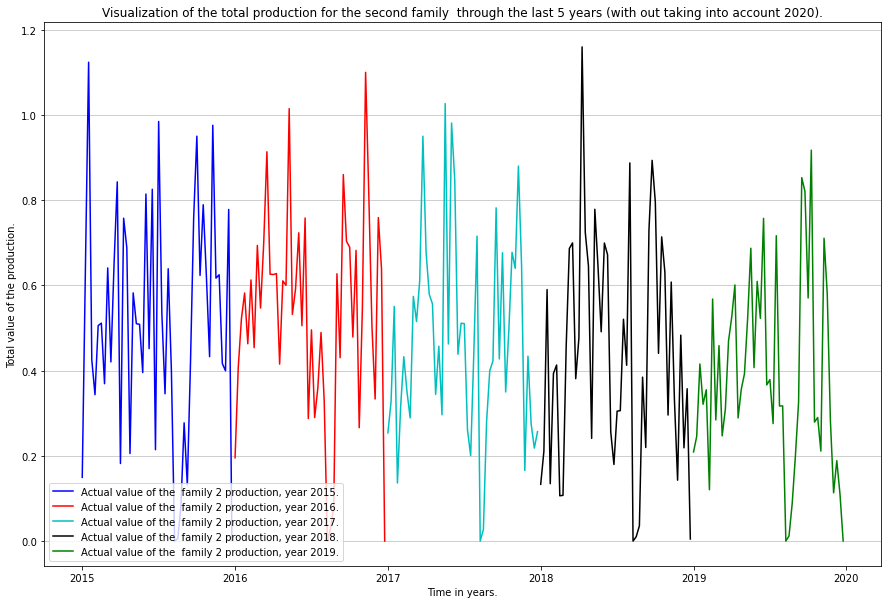

In [5]:
t = x.time
y_time_serie = y.target/10e5

## then we generate an array for each year
y_2015 = y_time_serie[0:48]
y_2016 = y_time_serie[48:96]
y_2017 = y_time_serie[96:144]
y_2018 = y_time_serie[144:192]
y_2019 = y_time_serie[192:240]

## now we want to see all years at the same time just to compare between them:
ax = plt.figure(figsize=(15,10)).add_subplot(111)
ax.plot(t[0:48],y_2015,'-b', label = 'Actual value of the  family 2 production, year 2015.')
ax.plot(t[48:96],y_2016,'-r', label = 'Actual value of the  family 2 production, year 2016.')
ax.plot(t[96:144],y_2017,'-c', label = 'Actual value of the  family 2 production, year 2017.')
ax.plot(t[144:192],y_2018,'-k', label = 'Actual value of the  family 2 production, year 2018.')
ax.plot(t[192:240],y_2019,'-g', label = 'Actual value of the  family 2 production, year 2019.')

## we add legend and titles as well:
ax.legend(loc='lower left')
plt.title('Visualization of the total production for the second family  through the last 5 years (with out taking into account 2020).')
plt.xlabel('Time in years.')
plt.ylabel('Total value of the production.')

plt.grid(axis='y', alpha=0.75)

It is hard to tell seeing the plot in this way if there exist any seasonability (even though), we see as well valleys when the year is close to the end, and suddenly, a pick. Let's test that pattern in a more carefully with a plot with a different line for each year.


**We see it is difficult to see a clear pattern how it the monthly case for the whole production.**

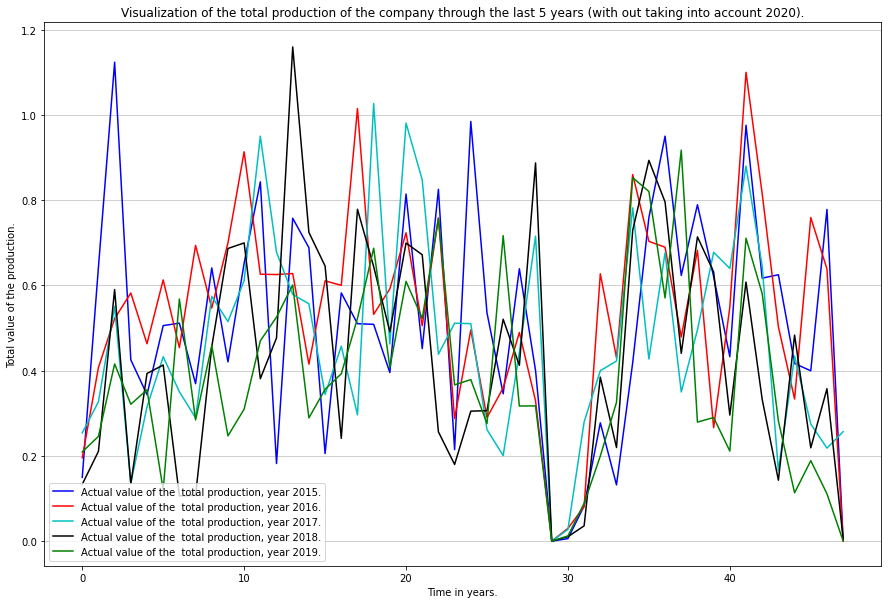

In [6]:
weeks = np.arange(0,48)

## now we want to see all years at the same time just to compare between them:
ax = plt.figure(figsize=(15,10)).add_subplot(111)
ax.plot(weeks,y_2015,'-b', label = 'Actual value of the  total production, year 2015.')
ax.plot(weeks,y_2016,'-r', label = 'Actual value of the  total production, year 2016.')
ax.plot(weeks,y_2017,'-c', label = 'Actual value of the  total production, year 2017.')
ax.plot(weeks,y_2018,'-k', label = 'Actual value of the  total production, year 2018.')
ax.plot(weeks,y_2019,'-g', label = 'Actual value of the  total production, year 2019.')

## we add legend and titles as well:
ax.legend(loc='lower left')
plt.title('Visualization of the total production of the company through the last 5 years (with out taking into account 2020).')
plt.xlabel('Time in years.')
plt.ylabel('Total value of the production.')

plt.grid(axis='y', alpha=0.75)

The idea is now, how to see how we can predict this time series for future years, out of Machines Learning. Let's start with a very simple way of problem solving: let's assume that last year results for each week could be a good indicator of how are going to be the demanded production for the very next year in our fashion family of production.

It is needed now to separate our test sample, we will take as probing data the last year obtained (2019).

Considering this mean value for the fashion weekly production, it is recommendable to scale our target values, dividing them by 1e3 (thousand of euros).  

In [7]:
y.target.mean()

468277.0682916667

In [8]:
y_test = y.target[192:240]/1e3
y_train = y.target[0:192]/1e3

In [9]:
## let's use our ready to use method called 'predict_with_last_year()':

prediction_2019_ly = predict_with_last_year(target =  y_train, time_units_year= 48)

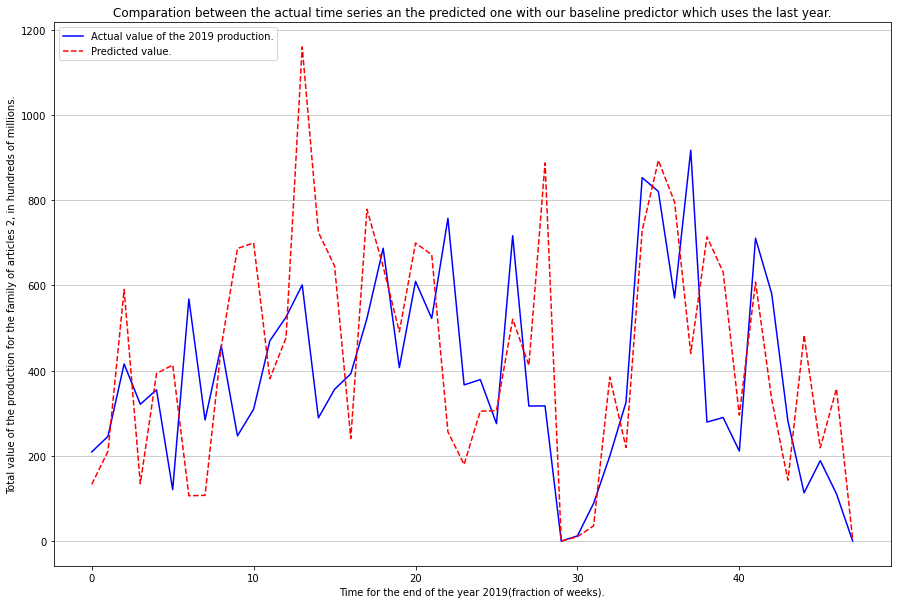

In [11]:

y_test = np.asarray(y_test)
from pylab import rcParams
ax = plt.figure(figsize=(15,10)).add_subplot(111)
ax.plot(y_test,'-b', label = 'Actual value of the 2019 production.')
ax.plot(prediction_2019_ly, '--r', label = 'Predicted value.')
ax. legend(loc='upper left')
plt.title('Comparation between the actual time series an the predicted one with our baseline predictor which uses the last year.')
plt.xlabel('Time for the end of the year 2019(fraction of weeks).')
plt.ylabel('Total value of the production for the family of articles 2, in hundreds of millions.')

plt.grid(axis='y', alpha=0.75)

In [18]:
## with the RMSE error metric we see an average error of 253 thousand of euros:

mean_squared_error(y_test, prediction_2019_ly, squared=False)

253.6403555901726

Now will be appropiate to use a more 'complicated' base  line predictor, it could be a good choice to use the EMA as a metric. When the alpha parameter is optimized is when ML starts to show up, due to the fact we pick the best value of importance for the last data which is accesible, and this, goes deeper that intuition and beliefs of a human being.

Alpha 0.1obtains an rmse error of 249.41021120761744.
Alpha 0.25obtains an rmse error of 218.3528012009183.
Alpha 0.5obtains an rmse error of 211.45189316944294.
Alpha 0.75obtains an rmse error of 228.2652520493974.
Alpha 0.9obtains an rmse error of 242.67342597962428.


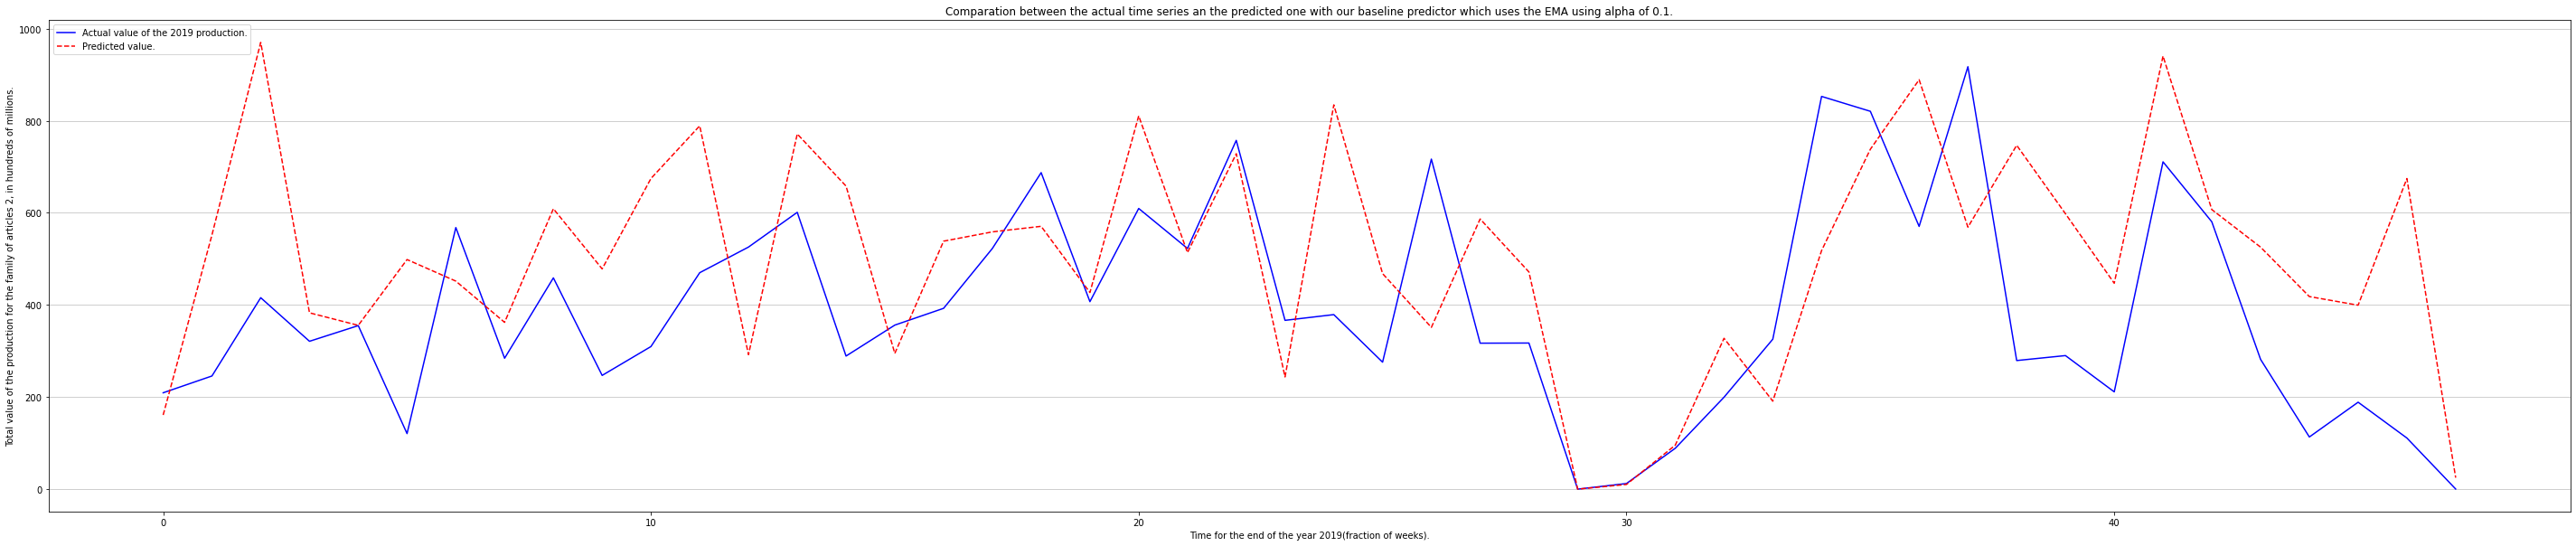

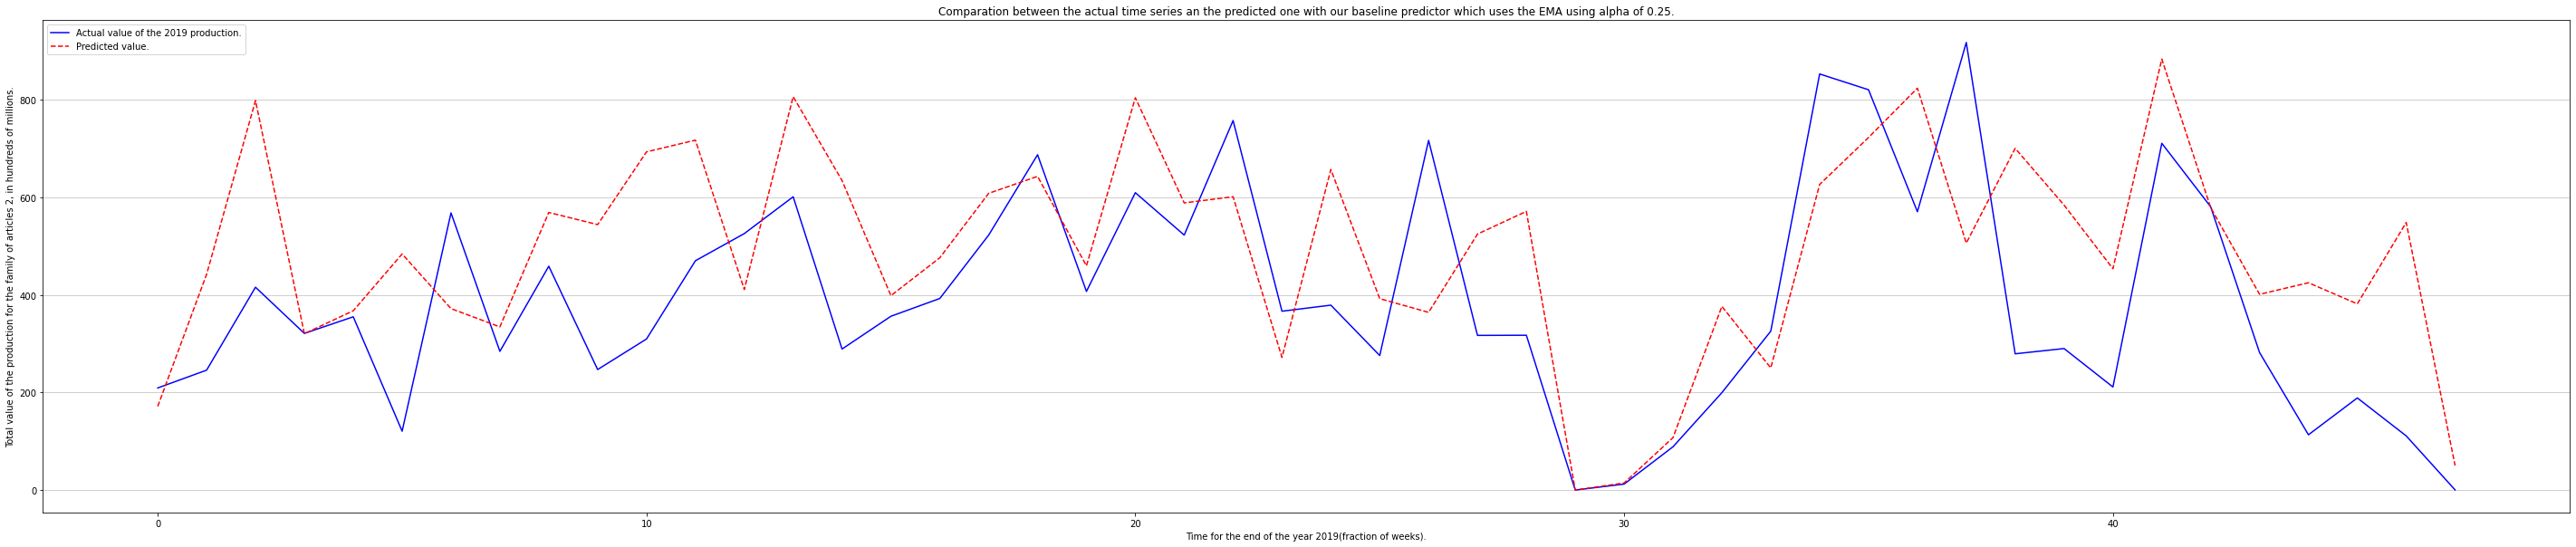

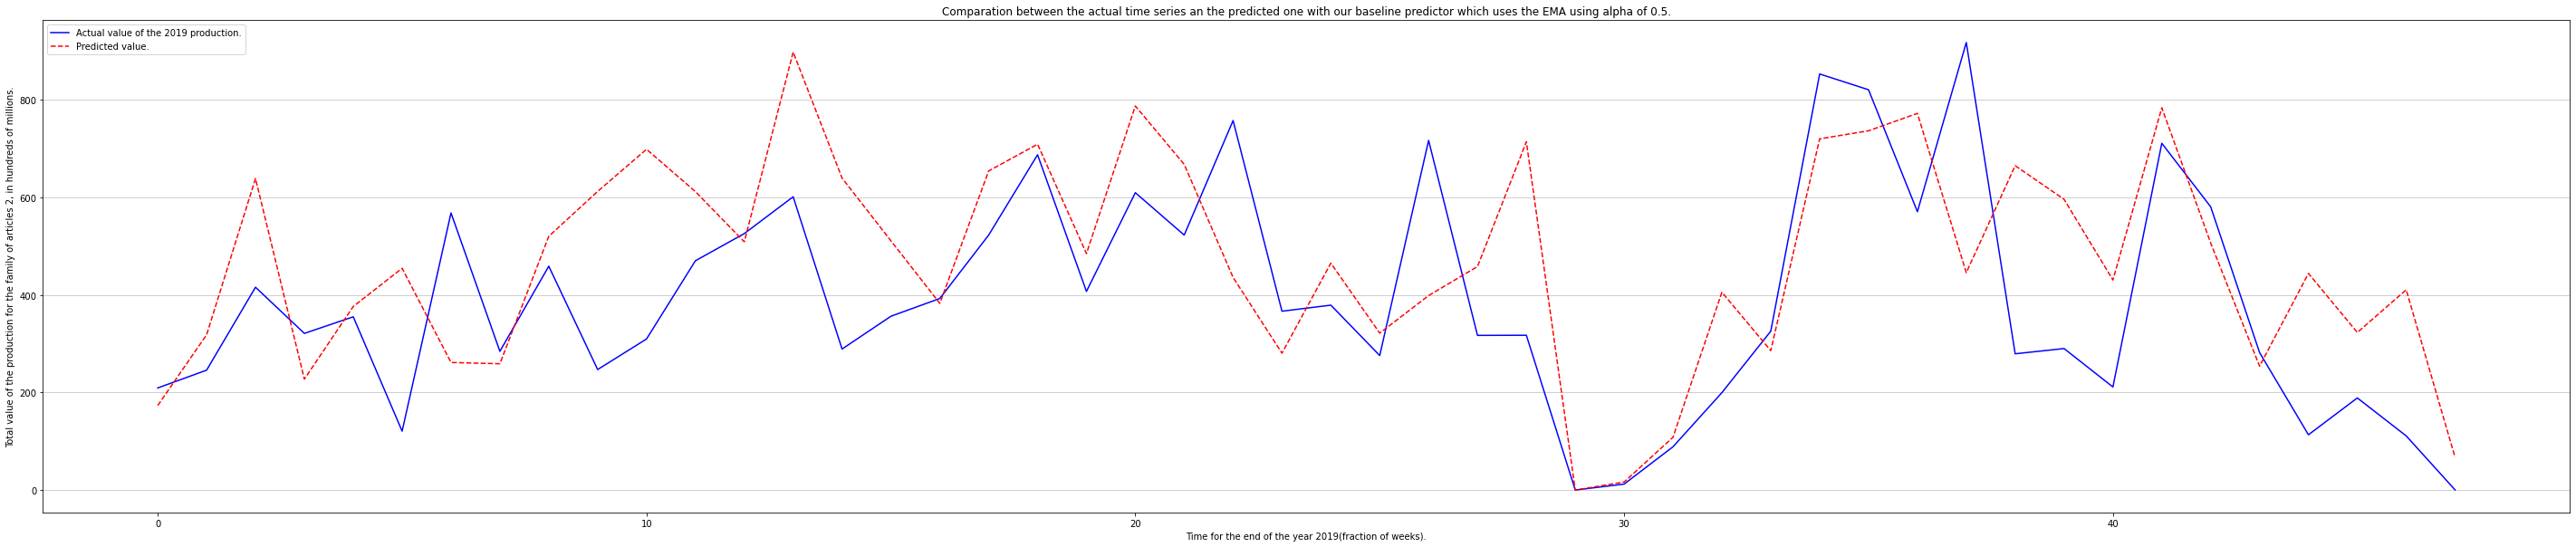

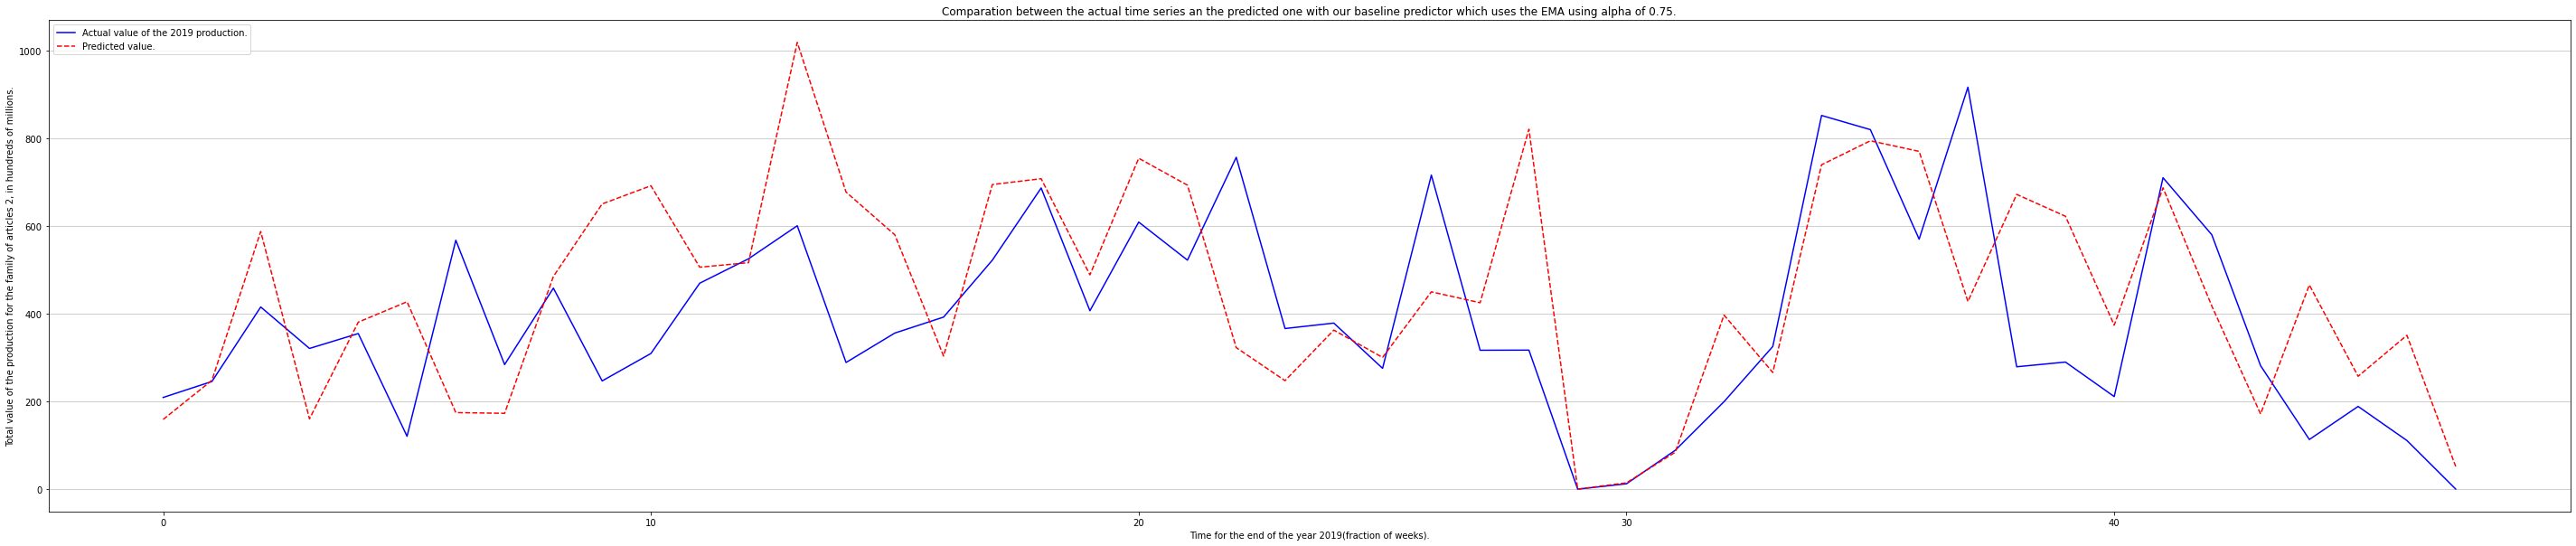

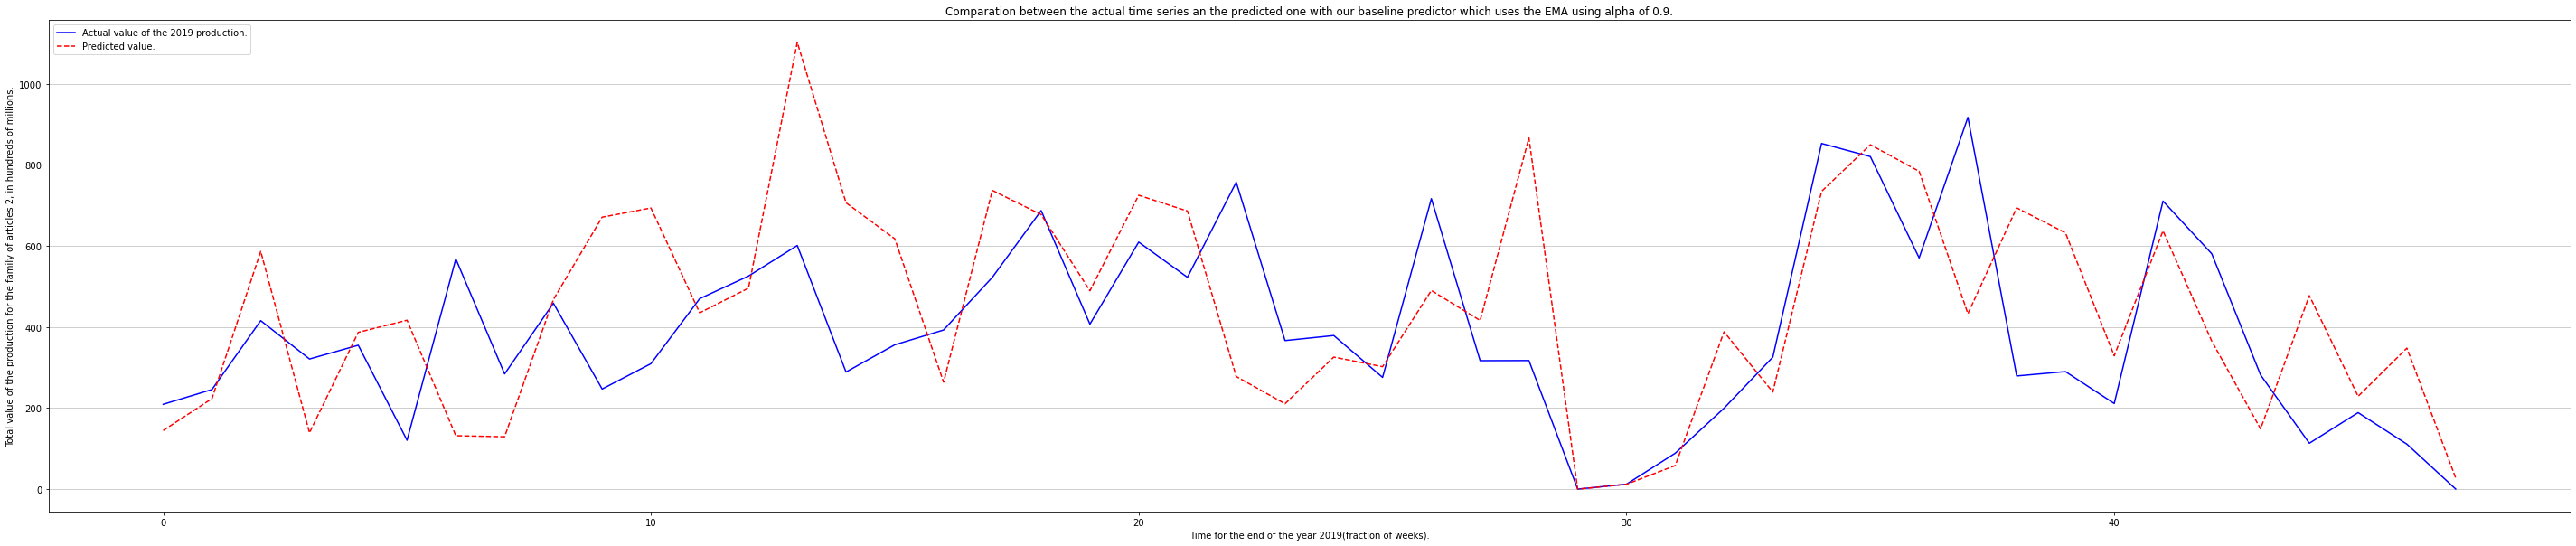

In [24]:
lista = [0.1,0.25,0.5,0.75,0.9]
for value_alpha in lista:
    prediction_with_ema_19= predict_with_ema(y_train, 48, alpha=value_alpha)

    from pylab import rcParams
    ax = plt.figure().add_subplot(111)
    ax.plot(y_test,'-b', label = 'Actual value of the 2019 production.')
    ax.plot(prediction_with_ema_19, '--r', label = 'Predicted value.')
    ax. legend(loc='upper left')
    plt.title('Comparation between the actual time series an the predicted one with our baseline predictor which uses the EMA using alpha of '+str(value_alpha)+'.')
    plt.xlabel('Time for the end of the year 2019(fraction of weeks).')
    plt.ylabel('Total value of the production for the family of articles 2, in hundreds of millions.')
    plt.grid(axis='y', alpha=0.75)
    rcParams['figure.figsize'] = 50, 10
    error = mean_squared_error(y_test, prediction_with_ema_19, squared=False)
    print('Alpha '+str(value_alpha)+'obtains an rmse error of '+str(error)+'.')
    

We have a first estimation of how complicated our problem could be. The starting point is 211 thousand of euros having RMSE as an error. 